# Linear Model

## Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fetch_mnist import fetch_mnist
np.random.seed(1)

## Data

As a preprocessing step, the labels are converted to a one-hot encoded sparse matrix. [One hot encoding](https://en.wikipedia.org/wiki/One-hot) is just a way of replacing each integer in the label vector with a row of zeros, except at the position specified by the integer, where you put a 1.

Note that the inverse transformation of the one-hot encoding can always be performed by taking the `argmax` along `axis=1`.

Secondly, the image values are specified by an integer between 0 and 255. We convert these pixel values to a float between 0 and 1.

In [2]:
train_data, test_data = fetch_mnist()
train_labels = np.int32(train_data[:,0])
train_labels_onehot = np.zeros((len(train_labels), 10))
train_labels_onehot[np.arange(len(train_labels)),train_labels] = 1
train_values = np.float32(train_data[:,1:])/255

test_labels = np.int32(test_data[:,0])
test_labels_onehot = np.zeros((len(test_labels), 10))
test_labels_onehot[np.arange(len(test_labels)),test_labels] = 1
test_values = np.float32(test_data[:,1:])/255

We can visualize the different digits by writing a visualization function that reshapes the 784D train and test values into a 28x28 grid:

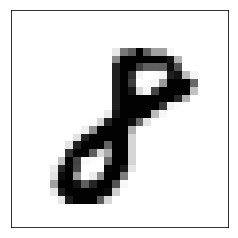

In [3]:
def show_digit(digit_array):
    plt.imshow(digit_array.reshape(28,28), cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
show_digit(train_values[31])

# Train

We train a simple linear regression model to arrive at a test accuracy of 0.86:

In [4]:
#from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge as LR  # alternative for normal LR

lr = LR()
lr.fit(train_values, train_labels_onehot)

train_predict_onehot = lr.predict(train_values)
test_predict_onehot = lr.predict(test_values)

# Take the maximum value along the first axis to convert back 
# from onehot encoding to integer labels.
train_predict = np.argmax(train_predict_onehot, axis=1)


# Calculate the accuracy
train_accuracy = 100*np.mean(train_predict == train_labels)

print(f"train accuracy = {train_accuracy:5.2f}")

train accuracy = 85.74


# Test

Finally, the accuracy on the test set can be evaluated:

In [5]:
test_predict = np.argmax(test_predict_onehot, axis=1)
test_accuracy = 100*np.mean(test_predict == test_labels)
print(f"test accuracy = {test_accuracy:5.2f}")

test accuracy = 86.04


Visualize an example

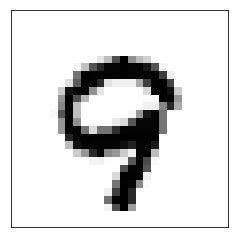

prediction=9	target=9


In [6]:
N = 315
show_digit(test_values[N])
prediction_onehot = lr.predict(test_values[N:N+1])
prediction = np.argmax(prediction_onehot)
target = test_labels[N].item()
print(f'prediction={prediction}\ttarget={target}')